# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("fraudTest.csv")

In [44]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [45]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]
X

/var/folders/y6/hsycml2j7j76pl67fsw7m4gr0000gn/T/ipykernel_47650/691744865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/y6/hsycml2j7j76pl67fsw7m4gr0000gn/T/ipykernel_47650/691744865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,25,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,29.84,302,33,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,41.28,34496,53,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,60.05,54767,15,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,3.19,1126,17,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,519,7,False,False,False,False,False,True,False,False,False,False,False,False,False,False
555715,111.84,28739,9,False,False,False,False,False,False,False,True,False,False,False,False,False,False
555716,86.88,3684,15,False,False,False,False,False,False,False,True,False,False,False,False,False,False
555717,7.99,129,24,False,False,False,False,False,False,False,False,False,False,False,False,False,True


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [9]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [10]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [13]:
over_log.score(X_test, y_test)

0.9054679814774826

In [14]:
under_log.score(X_test, y_test)

0.9107944048561626

In [15]:
smote_log.score(X_test, y_test)

0.9007533770004079

# 5.) Which performed best in Out of Sample metrics?

In [16]:
# Sensitivity here in credit fraud is more important as seen from last class

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
y_true = y_test

In [19]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75217,  7799],
       [   81,   261]])

In [20]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7631578947368421


In [21]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75660,  7356],
       [   80,   262]])

In [22]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7660818713450293


In [23]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[74824,  8192],
       [   81,   261]])

In [24]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7631578947368421


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [50]:
col = list(X.columns)
col.append("is_fraud")

raw_temp = np.column_stack((X_train, y_train))
raw_temp = pd.DataFrame(raw_temp, columns=col)

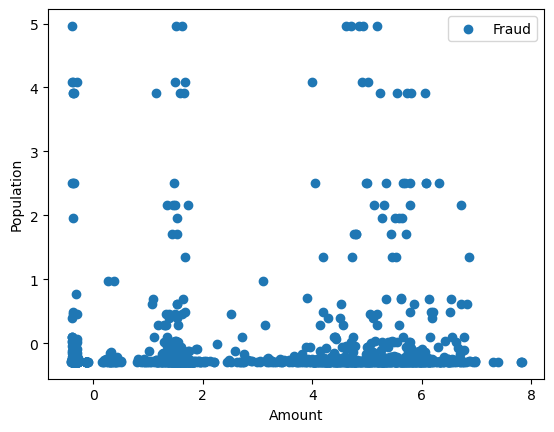

In [51]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [52]:
raw_temp = np.column_stack((smote_X, smote_y))
raw_temp = pd.DataFrame(raw_temp, columns=col)

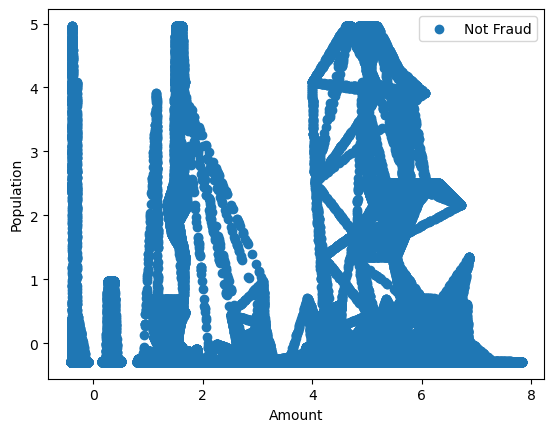

In [53]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why.

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [59]:
resampling_methods = {
    "over": RandomOverSampler(), 
    "under": RandomUnderSampler(),
    "smote": SMOTE()
}

model_configs = {
    "LOG": LogisticRegression(),
    "LASSO": LogisticRegression(penalty="l1", C=2., solver="liblinear"),
    "DTREE": DecisionTreeClassifier()
}

In [70]:
def calc_perf_metric(y_true, y_pred):
    tp, fp, tn, fn = confusion_matrix(y_true, y_pred).ravel()
    
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return(sensitivity, specificity, precision, recall, f1)

In [71]:
trained_models = {}
results = []

In [72]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_key, model in model_configs.items():
        combined_key = f"{resample_key}_{model_key}"
        
        m = model.fit(resample_X, resample_y)
        
        trained_models[combined_key] = m
        
        y_pred = m.predict(X_test)
        
        sensitivity, specificity, precision, recall, f1 = calc_perf_metric(y_test, y_pred)
        
        results.append({"Model": combined_key,
                        "Sensitivity": sensitivity,
                        "Specificity": specificity,
                        "Precision": precision,
                        "Recall": recall,
                        "F1": f1})

In [73]:
results_df = pd.DataFrame(results)

In [74]:
results_df

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.996527,0.009862,0.031097,0.763158,0.059760
1,over_LASSO,0.996527,0.009866,0.031108,0.763158,0.059780
2,over_DTREE,0.997785,0.572464,0.609272,0.538012,0.571429
3,under_LOG,0.996393,0.007468,0.024050,0.766082,0.046636
4,under_LASSO,0.996391,0.007430,0.023929,0.766082,0.046409
5,under_DTREE,0.996034,0.006675,0.070074,0.918129,0.130209
6,smote_LOG,0.996533,0.010036,0.031633,0.763158,0.060747
7,smote_LASSO,0.996533,0.010042,0.031652,0.763158,0.060782
8,smote_DTREE,0.997121,0.152717,0.292025,0.695906,0.411409


From the results table above, the Decision Tree model using the oversampling method seems to perform the best. It results in the highest sensitivity, specificity, precision, and F1 score. Even though it has the lowest recall out of all the models, its F1 score is significantly above all other models.